<a href="https://colab.research.google.com/github/RCutrino/MLPNS_RCutrino/blob/main/TimeSeriesClustering_instructions_31_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clustering analysis on population trends
You are clustering the "shape" of time series to find trends, specifically, population growth trends. Do any countries stand out in the population growth trends in the past 60 years? are there groups of countries that have similar trends (and why?)

NOTE: your clusters may not be identical to mine!

##Imports

In [2]:
pip install xlrd==2.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


###you need to restart the kernel after you do this

In [3]:
import pandas as pd
import pylab as pl
import numpy as np

from sklearn import preprocessing
from sklearn import cluster

pl.rcParams['font.size'] = 10

#Data processing

##Get the data

The data will be pulled from the drive. So, here I mount my google drive and get it from https://github.com/fedhere/MLPNS_FBianco/tree/main/clustering. The file name is SP.POP.TOTL?downloadformat=excel

Will have to skip some rows (skiprows=) and ideally only use relevant columns (the country name and each year column from 1960, you can use usecold=

Finally, will set the country name as the index for this dataframe. Will do that with set_index() passing the relevant column name as the argument (Not forgeting the idea is to wanting to do it inplace! inplace=True)

In [7]:
#reading in the data from the excel in the github repo, subfolder clustering
#use skiprows to gewt the right format
pop_df = pd.read_excel('https://github.com/fedhere/MLPNS_FBianco/blob/main/clustering/SP.POP.TOTL_downloadformat=excel?raw=true',skiprows=3)
pop_df 

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1791000.0,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1775378.0
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315351.0,5393034.0,5473671.0,5556767.0,5641598.0,5727745.0,...,23807586.0,24473176.0,25147112.0,25823488.0,26497881.0,27168210.0,27834811.0,28498683.0,29161922.0,29825968.0
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099836.0,17524533.0,17965733.0,18423157.0,18896303.0,19384838.0,...,52003759.0,52832659.0,53687125.0,54544184.0,55386369.0,56207649.0,57009751.0,57792520.0,58558267.0,59308690.0
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070780.0,3164330.0,3260645.0,3360099.0,3463211.0,3570466.0,...,14023199.0,14465148.0,14926551.0,15399793.0,15879370.0,16363449.0,16853608.0,17351714.0,17861034.0,18383956.0


In [8]:
columns = ['Country Name', '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020']    
#throw away unnecessary columns
pop_df = pop_df[columns]  

pop_df.set_index("Country Name", inplace=True)     

In [9]:
print("The shape of the original dataset is: ", pop_df.shape)

The shape of the original dataset is:  (266, 61)


In [10]:
#Checking the data content from the first 5 rows
pop_df.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


In [11]:
pop_df.describe()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,...,2.650000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02,2.640000e+02
mean,1.173116e+08,1.188586e+08,1.209679e+08,1.235882e+08,1.262297e+08,1.289366e+08,1.317868e+08,1.346309e+08,1.375436e+08,1.405603e+08,...,2.828664e+08,2.876904e+08,2.914996e+08,2.953218e+08,2.991360e+08,3.029648e+08,3.068068e+08,3.105688e+08,3.142511e+08,3.178433e+08
std,3.705555e+08,3.749081e+08,3.814322e+08,3.899277e+08,3.984666e+08,4.072394e+08,4.165735e+08,4.258523e+08,4.353820e+08,4.452976e+08,...,8.906976e+08,9.033226e+08,9.145177e+08,9.257010e+08,9.368180e+08,9.479474e+08,9.591275e+08,9.699792e+08,9.805328e+08,9.907252e+08
min,2.833000e+03,3.077000e+03,3.367000e+03,3.703000e+03,4.063000e+03,4.460000e+03,4.675000e+03,4.922000e+03,5.194000e+03,5.461000e+03,...,1.006900e+04,1.013600e+04,1.020800e+04,1.028900e+04,1.037400e+04,1.047400e+04,1.057700e+04,1.067800e+04,1.076400e+04,1.083400e+04
25%,5.022802e+05,5.109642e+05,5.206540e+05,5.311622e+05,5.421252e+05,5.533362e+05,5.647475e+05,5.823645e+05,5.981078e+05,6.100030e+05,...,1.562996e+06,1.539939e+06,1.574621e+06,1.609909e+06,1.645868e+06,1.689616e+06,1.716772e+06,1.740174e+06,1.751950e+06,1.756929e+06
50%,3.718330e+06,3.826398e+06,3.929109e+06,4.015834e+06,4.124521e+06,4.242788e+06,4.326013e+06,4.387887e+06,4.474171e+06,4.550402e+06,...,9.461643e+06,9.824808e+06,9.948838e+06,1.001582e+07,1.022085e+07,1.036160e+07,1.040671e+07,1.045548e+07,1.047907e+07,1.052617e+07
75%,2.636053e+07,2.721235e+07,2.808607e+07,2.890669e+07,2.972333e+07,3.055227e+07,3.134845e+07,3.200449e+07,3.244145e+07,3.277149e+07,...,5.937945e+07,6.057984e+07,6.120753e+07,6.174243e+07,6.182699e+07,6.187352e+07,6.191725e+07,6.193141e+07,6.150589e+07,6.160448e+07
max,3.032156e+09,3.071596e+09,3.124561e+09,3.189656e+09,3.255146e+09,3.322047e+09,3.392098e+09,3.461620e+09,3.532783e+09,3.606554e+09,...,7.003760e+09,7.089255e+09,7.175500e+09,7.261847e+09,7.347679e+09,7.433569e+09,7.519183e+09,7.602454e+09,7.683372e+09,7.761620e+09


#Data cleaning
Are there missing values?? To remove NaNs and also remove any other unwanted columns or rows

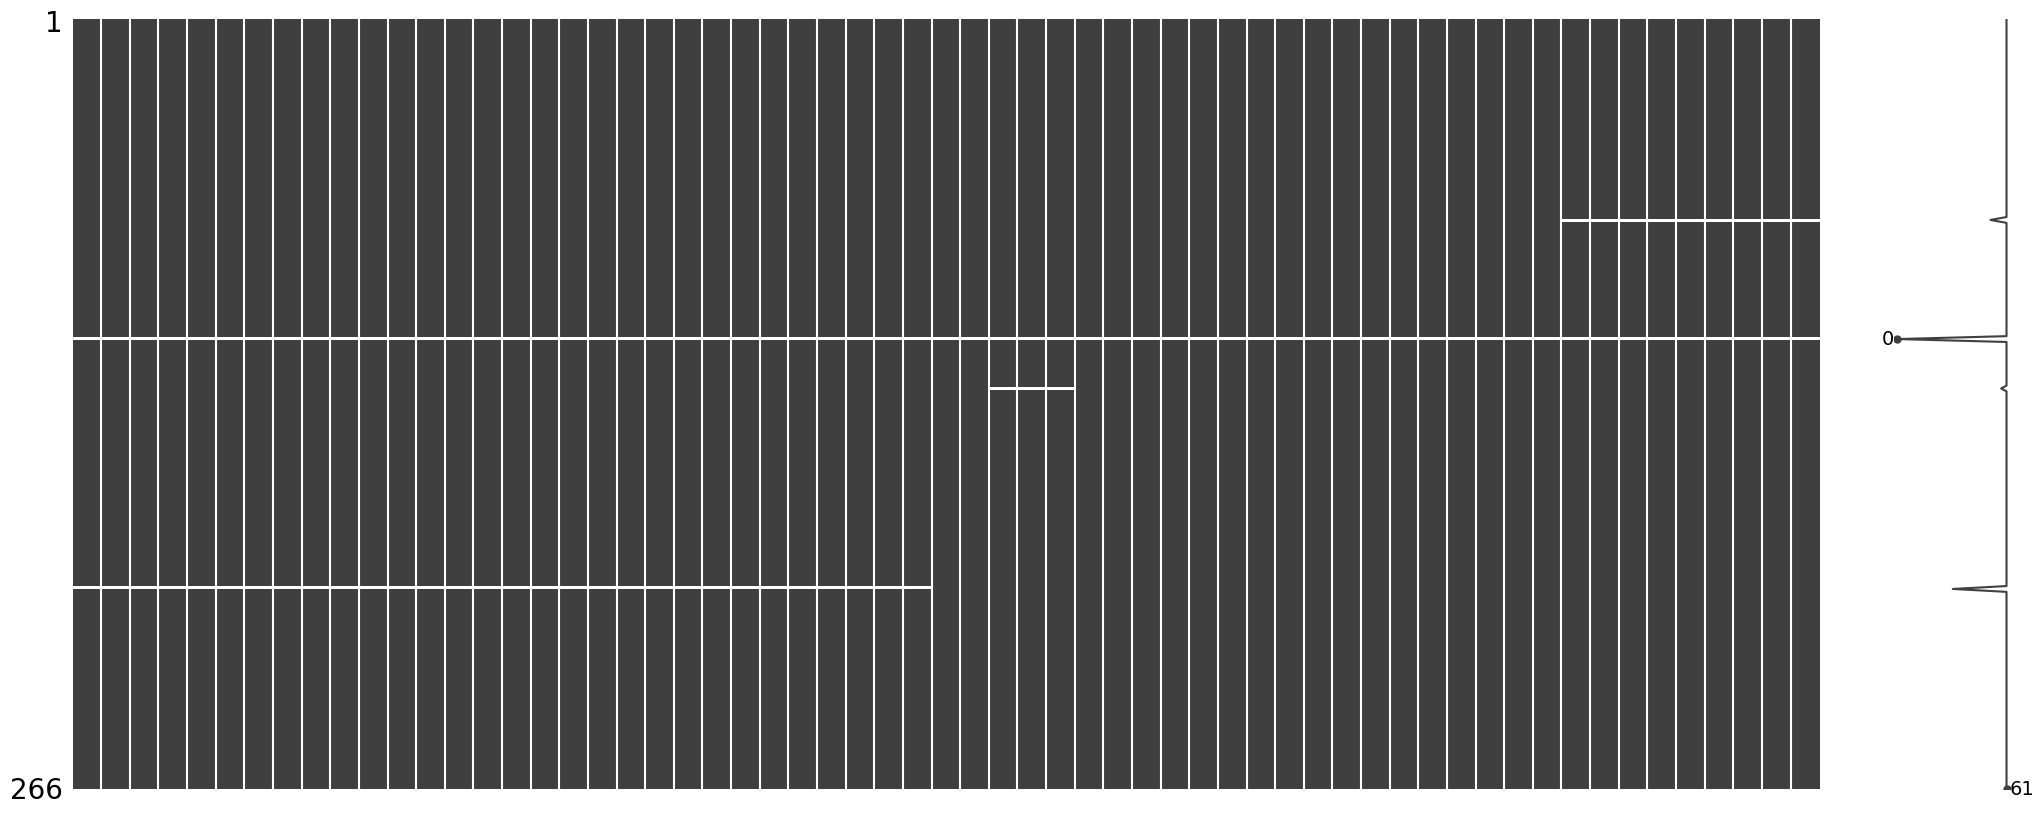

In [12]:
#this package visualizes ,issing values
import missingno as msno
msno.matrix(pop_df);

In [13]:
#would you drop _rows_ with missing values, or _columns_ ?
#choose the right axis in this call
pop_df_clean = pop_df.dropna(axis = 0, how='any') 

In [14]:
#Determining the shape of the data
print("The shape of the cleaned dataset is: ", pop_df_clean.shape)

The shape of the cleaned dataset is:  (262, 61)


In [15]:
#Checking the content of the first 5 rows of the cleaned  dateset with NO NaNs 
pop_df_clean.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,58734.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,165611760.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,10893772.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,117468741.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,5803677.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


##scaling
Standardize the data: We are working with time series, so each datapoint (=each country) has to be mean 0 and standard deviaion 1 along the rows (that is axis 1)

We use the preprocessing.scale function. Make sure you check! you want eavery country mean to be 0 and every country standard deviation to be 1...

In [ ]:
print(pop_standard.mean(axis=), pop_standard.std(axis=...)) #all means should be ~0, alll std ~ 1

##Visualize the data
Making a plot of the time series before scaling, and after scaling. What do you see in the scaled version that was lost before? Dont forget to write a caption!

<Axes: >

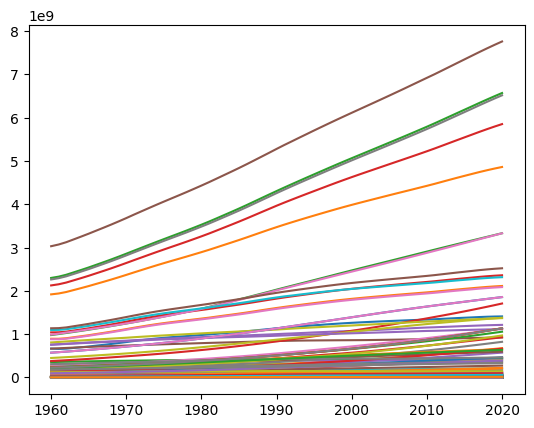

In [20]:
pop_df_clean.T.plot(legend=False)

In [36]:
pop_standard=preprocessing.scale(pop_df_clean,axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


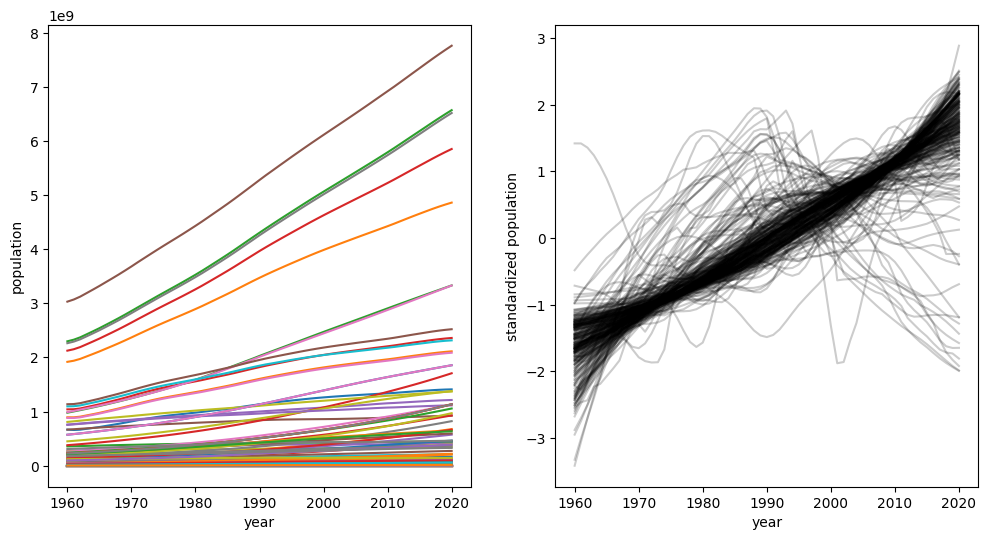

In [37]:
# looking at the data
fig, ax = pl.subplots(1,2, figsize=(12,6)) #plot the original and standardized plot side by side
pop_df_clean.T.plot(legend=False, ax=ax[0]);
ax[1].plot(pop_standard.T, color='k', alpha=0.2);

ax[0].set_xlabel('year')
ax[0].set_ylabel('population')
ax[1].set_xlabel('year')
ax[1].set_ylabel('standardized population')
ax[1].set_xticks(range(0,70,10))
ax[1].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

##Make a cluster model with KMeans
Use kmeans (sklearn.cluster.KMeans) to cluster the data. Make 9 models for number of clusters = 2, 3, 4, 5, 6, 7, 8, 9, 10.

For each model, fit the data and calculate the "inertia" which is

##Use an elbow plot to figure out ideal cluster n

In [39]:
# For n_clusters = 2 this would look as:
model = cluster.KMeans(n_clusters = 2, random_state=302)
model.fit(pop_standard)
v = model.inertia_
print('The model inertia is:', f"{v:.4f}" )


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The model inertia is: 1249.5287


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

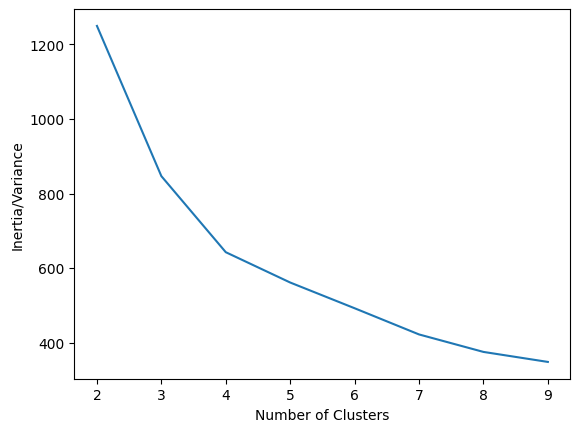

In [42]:
# Now using the "inertia" (intracluster variance essentially) to make an Elbow plot: 
# inertia is the y axis, the number of clusters are the x axis.
# Now assessing if the elbow plot shows an inflection, which can be used to determine the "right" number of clusters
inertia = []
for i in range(2, 10): 
  model = cluster.KMeans(n_clusters = i, random_state=302).fit(pop_standard)
  inertia.append(model.inertia_)
pl.plot(range(2, 10), inertia)
pl.xlabel("Number of Clusters")
pl.ylabel("Inertia/Variance");
     

##Pick the hyperparameters
ick the model you prefer from the suite of models above, plot the data for each cluster separately. If for example you have made 4 clusters, then you fould do:

In [45]:
model = cluster.KMeans(n_clusters = 4)
model.fit(pop_standard)
v = model.inertia_
print('The model inertia is:', f"{v:.4f}" )

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The model inertia is: 642.2297


In [44]:
#Here we now chech the model lables
model.labels_

array([0, 0, 0, 0, 0, 2, 3, 0, 0, 4, 8, 3, 0, 4, 0, 4, 0, 0, 0, 0, 4, 6,
       0, 4, 6, 8, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 8, 0, 4, 4, 3, 0, 0, 0,
       0, 4, 0, 4, 4, 4, 2, 5, 0, 0, 2, 3, 4, 5, 4, 4, 4, 3, 4, 3, 2, 3,
       4, 0, 4, 4, 6, 0, 3, 0, 4, 3, 4, 2, 3, 0, 0, 6, 0, 4, 0, 0, 0, 0,
       3, 0, 2, 4, 3, 5, 4, 3, 0, 0, 6, 4, 6, 4, 4, 0, 0, 4, 0, 3, 4, 0,
       4, 0, 4, 0, 4, 3, 0, 2, 2, 0, 4, 0, 0, 7, 3, 4, 4, 0, 0, 3, 4, 4,
       0, 0, 3, 3, 4, 4, 3, 3, 1, 0, 6, 0, 3, 4, 4, 8, 0, 0, 4, 4, 3, 4,
       2, 0, 0, 3, 4, 2, 4, 3, 0, 0, 3, 0, 4, 4, 4, 4, 0, 0, 4, 3, 0, 4,
       2, 0, 4, 0, 0, 0, 4, 4, 4, 3, 0, 2, 0, 2, 3, 3, 4, 4, 4, 3, 0, 1,
       2, 0, 4, 0, 0, 0, 0, 0, 0, 3, 4, 0, 8, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       3, 3, 4, 3, 0, 0, 3, 2, 0, 3, 4, 4, 4, 0, 4, 2, 4, 0, 3, 4, 4, 4,
       0, 0, 1, 3, 3, 4, 4, 2, 4, 0, 2, 4, 0, 4, 4, 2, 0, 4, 0, 3],
      dtype=int32)

In [46]:
#Definting the models c, and determine the model centers in the k-means cluster
c = model.cluster_centers_

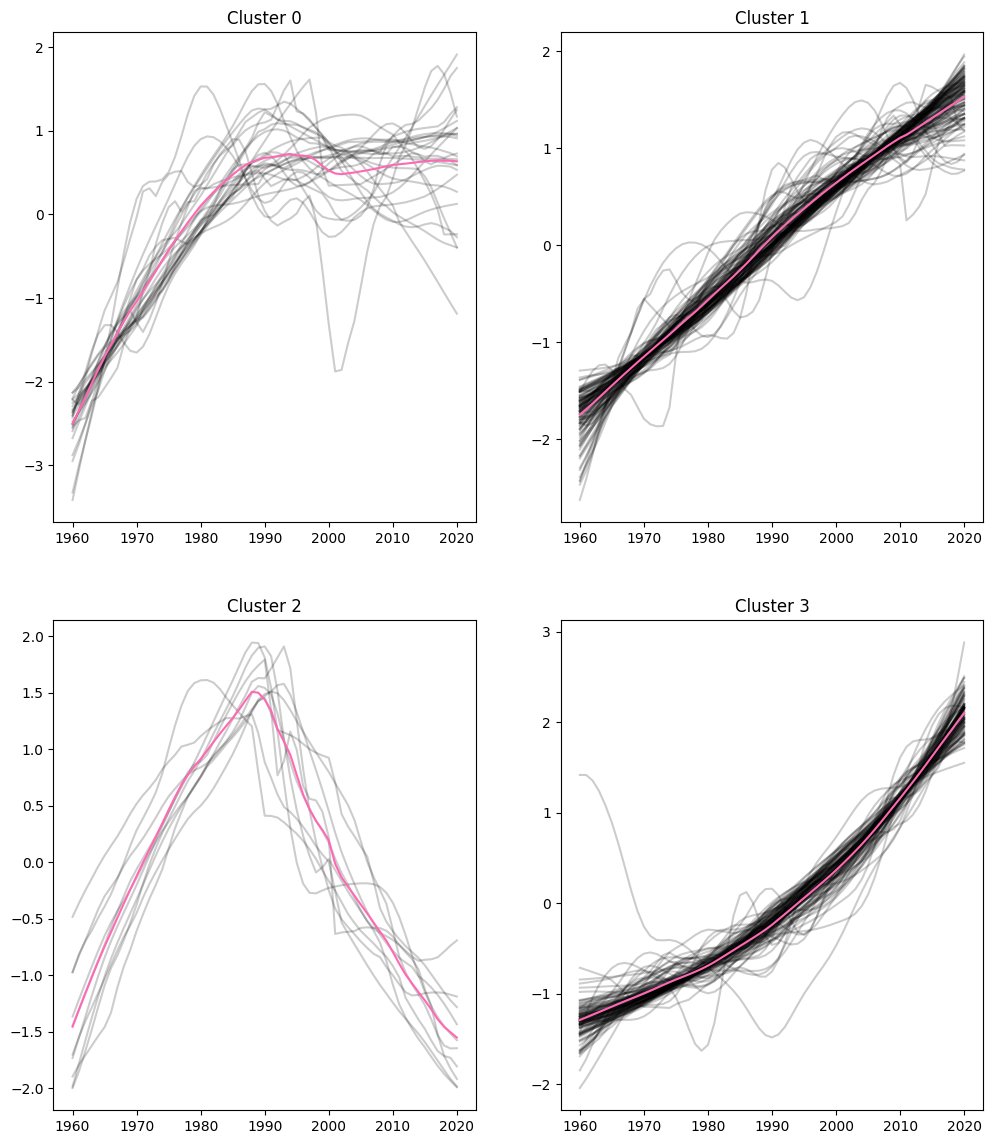

In [50]:
fig,ax = pl.subplots(2,2, figsize=(12,14))
ax[0,0].set_title('Cluster 0');
ax[0,0].plot(pop_standard[model.labels_==0].T,color='k',alpha=0.2);
ax[0,0].plot(c[0],color='hotpink');
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[0,1].set_title('Cluster 1');
ax[0,1].plot(pop_standard[model.labels_==1].T,color='k',alpha=0.2);
ax[0,1].plot(c[1],color='hotpink');
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[1,0].set_title('Cluster 2');
ax[1,0].plot(pop_standard[model.labels_==2].T,color='k',alpha=0.2);
ax[1,0].plot(c[2],color='hotpink');
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[1,1].set_title('Cluster 3');
ax[1,1].plot(pop_standard[model.labels_==3].T,color='k',alpha=0.2);
ax[1,1].plot(c[3],color='hotpink');
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

In [51]:
for i in range(4):
  print ("total items in cluster {:d}: {:d}".format(
      i+1, np.sum(model.labels_ == i)))

total items in cluster 1: 26
total items in cluster 2: 116
total items in cluster 3: 10
total items in cluster 4: 110


#Extra Credit: Doing the same analysis using density clustering method.

In [ ]:
# try to find a DBSCAN set of hyperparameter that gives upi 4 clusters. 
# are they the ssame as the kmeans ones? why? why not?

for i in np.arange(....):
  model = cluster.DBSCAN(..... #hyperparameters here from the loop. which hyperparameter is the model most sensitive to?
  model.fit(pop_standard)
  if model.labels_.max() > 0:
    print(i, model.labels_.max())


In [52]:
# For n_clusters = 4 this would look as:
model = cluster.DBSCAN(eps=0.2, min_samples=4)
model.fit(pop_standard)
model.labels_

array([-1,  0, -1,  0, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  0,  1,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  2,  3,  2, -1, -1,  3, -1,
       -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  3, -1,  1,
        1,  0,  0,  1,  0, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  0,  0, -1, -1,
        3,  1, -1,  2, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  3,  1, -1,
        1, -1, -1, -1, -1,  3, -1, -1, -1, -1,  0, -1, -1, -1, -1,  3, -1,
       -1,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  3, -1,  0,
       -1,  0, -1, -1, -1,  3, -1, -1, -1, -1, -1, -1, -1,  3, -1,  0,  0,
       -1,  0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [54]:
c=np.zeros((4,pop_standard.shape[1]))
for i in range(4):
  c[i]=pop_standard[model.labels_==i].mean(axis=0)

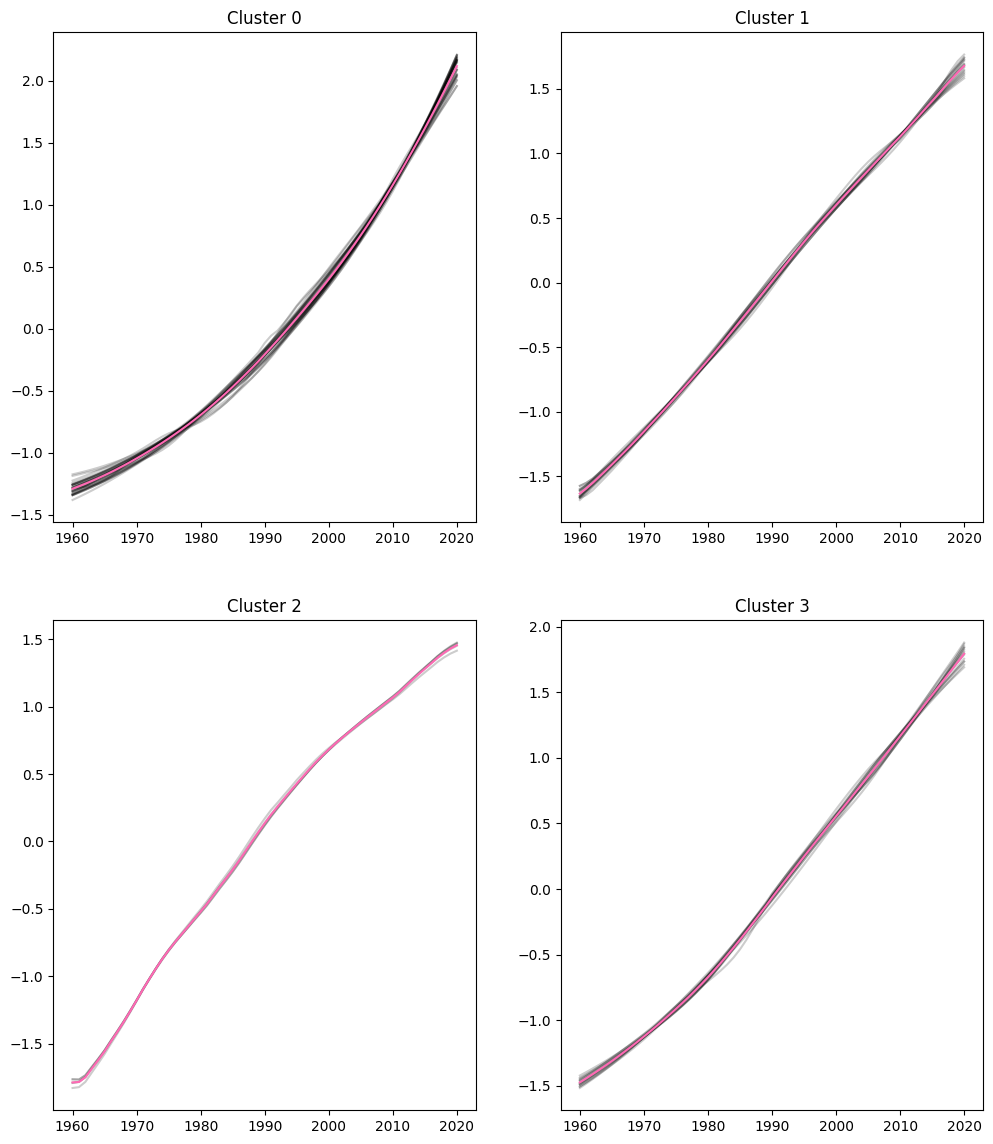

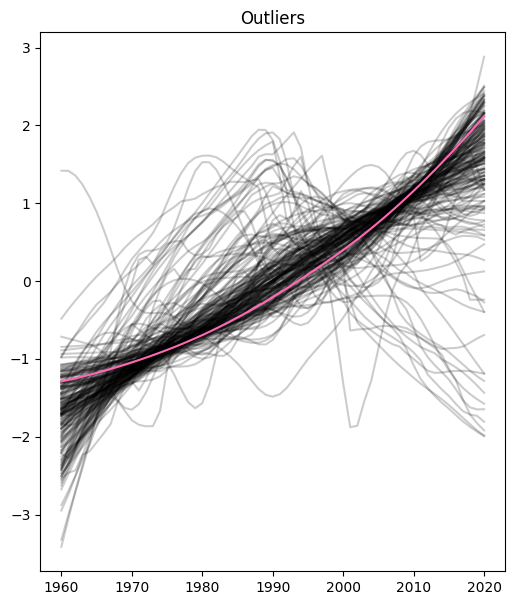

In [56]:
# remake the clusters plot for DBSCAN, but now incluse also the outliers
fig,ax = pl.subplots(2,2, figsize=(12,14))
ax[0,0].set_title('Cluster 0');
ax[0,0].plot(pop_standard[model.labels_==0].T,color='k',alpha=0.2);
ax[0,0].plot(c[0],color='hotpink');
ax[0,0].set_xticks(range(0,70,10))
ax[0,0].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[0,1].set_title('Cluster 1');
ax[0,1].plot(pop_standard[model.labels_==1].T,color='k',alpha=0.2);
ax[0,1].plot(c[1],color='hotpink');
ax[0,1].set_xticks(range(0,70,10))
ax[0,1].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[1,0].set_title('Cluster 2');
ax[1,0].plot(pop_standard[model.labels_==2].T,color='k',alpha=0.2);
ax[1,0].plot(c[2],color='hotpink');
ax[1,0].set_xticks(range(0,70,10))
ax[1,0].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);

ax[1,1].set_title('Cluster 3');
ax[1,1].plot(pop_standard[model.labels_==3].T,color='k',alpha=0.2);
ax[1,1].plot(c[3],color='hotpink');
ax[1,1].set_xticks(range(0,70,10))
ax[1,1].set_xticklabels(['%d'%i for i in range(1960,2030,10)]);


fig,ax = pl.subplots(1,1, figsize=(6,7))
ax.set_title('Outliers');
ax.plot(pop_standard[model.labels_==-1].T,color='k',alpha=0.2);
ax.plot(c[0],color='hotpink');
ax.set_xticks(range(0,70,10))
ax.set_xticklabels(['%d'%i for i in range(1960,2030,10)]);